<a href="https://colab.research.google.com/github/luisantoniourbanaviles/Simulacion-II/blob/main/Primer%20parcial/Primer%20examen/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente.

|**Periodicos**|**30**|**40**| 50 | 60 | 70 |
|--------------|------|------|----|----|----|
| f(x)         |  20\%| 25\% |25\%|20\%|10\%|

La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 periódicos. Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10 euros por el reciclaje de cada periódico no vendido.\\

Determine el beneficio promedio diario si pide 50 periódicos cada día.

(a) Por simulación [05 puntos]

(b) Anal ́ıticamente [05 puntos]

(c) Determine, por simulaci ́on, el pedido de peri ́odicos que optimiza el beneficio [05 puntos]


### Solucion por simulacion

**Paso 1.** Identifique las variables

Tenemos una variable: $X_1$

Que determianara cuantos periodicos se venderan en un dia

**Paso 2.** Formula la distribucion de probabilidad de la variable

|**Periodicos**|**30**|**40**| 50 | 60 | 70 |
|--------------|------|------|----|----|----|
| f(x)         |  0.20| 0.25 |0.25|0.20|0.10|

**Paso 3.** Enumere la distribucion acumulada de probabilidad de la variable

|**Periodicos**|**30**|**40**| 50 | 60 | 70 |
|--------------|------|------|----|----|----|
| f(x)         |  0.20| 0.25 |0.25|0.20|0.10|
| F(x)         |  0.20| 0.45 |0.70|0.90|1.00|

**Paso 4.** Establezca el intervalo de los números aleatorios

|**Periodicos**|**30**|**40**| 50 | 60 | 70 |
|--------------|------|------|----|----|----|
| f(x)         |  0.20| 0.25 |0.25|0.20|0.10|
| F(x)         |  0.20| 0.45 |0.70|0.90|1.00|
| Intervalor   | 0 - 0.19|0.20 - 0.44 | 0.45 - 0.69 |0.70 - 0.89| 0.90 - 1.00|

**Paso 5.** Defina el modelo del sistema y los objetivos de la simulación

La beneficio es \\

\begin{equation*}
    Beneficio = 1.10*ventasreales - 0.90*pedido - 0.10*novendidos - 020*ventasperdidas
\end{equation*}

In [50]:
# Librerias a usar

import random as rd
import matplotlib.pyplot as plt
import numpy as np
import math as mt

Y usando los intervalos calculados, podemos calcular el beneficio con cierto valor del pedido

In [51]:
# beneficio: Funcion que devuleve el beneficio con cierto pedido dado
def beneficio(pedido):
  X_1 =rd.random() 

  # Con el numero aleatorio, estas decisiones determinan cuantos periodicos
  # se venden en cierto dia

  if X_1>=0 and X_1<0.20:
    ventas_sim = 30

  if X_1>=0.20 and X_1<0.45:
    ventas_sim = 40

  if X_1>=0.45 and X_1<0.70:
    ventas_sim = 50

  if X_1>=0.70 and X_1<0.90:
    ventas_sim = 60

  if X_1>=0.90 and X_1<=1:
    ventas_sim = 70
    
  # De las especificaciones vistas en clase, aqui calculas las cantidades de
  # los periodicos vendidos, ventas perdidas y no vendidos
  if ventas_sim<=pedido:
    ventas_reales   = ventas_sim
    ventas_perdidas = 0
    no_vendidos     = pedido - ventas_reales
    
  if ventas_sim>pedido:
    ventas_reales   = pedido
    ventas_perdidas = ventas_sim - pedido
    no_vendidos     = 0

  B = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas
  return(B)

In [60]:
beneficio(50)

-14.0

**Paso 5.** Diseño del experimento

Para estimar el beneficio promedio, durante n dias calculamos el posbile beneficio

In [61]:
# benef_promedio: Funcion que devuelve una lista con el promedio del
# beneficio
def benef_promedio(n,p):
  l1 =[]
  l2 =[] 
  for x in range(n):
    l1.append(beneficio(p))
    l2.append(np.mean(l1))
  return(l2)


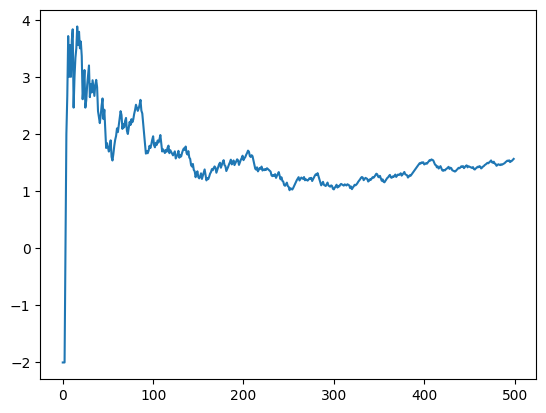

In [78]:
B = benef_promedio(500,50)

plt.plot(B)
plt.show()

Se puede observar que con 500 iteraciones se estabiliza la grafica de beneficio

El beneficio tiene una media y una desviacion estandar de


In [79]:
print('x_p =',np.mean(B))
print('s_p =',np.std(B))

x_p = 1.555668358822686
s_p = 0.5978796475596304


**Paso 6.** Repita el experimento n veces


In [80]:
# modelo: funcion que repite el experimento n veces
# Devuelve una lista con los beneficios promedio de cada experimento
def modelo(n,p):
  l1 = []

  for x in range(n):
    Benef_prom = benef_promedio(500,p)
    l1.append(np.mean(Benef_prom))

  return(l1)

In [81]:
Y_1 = modelo(120,50)

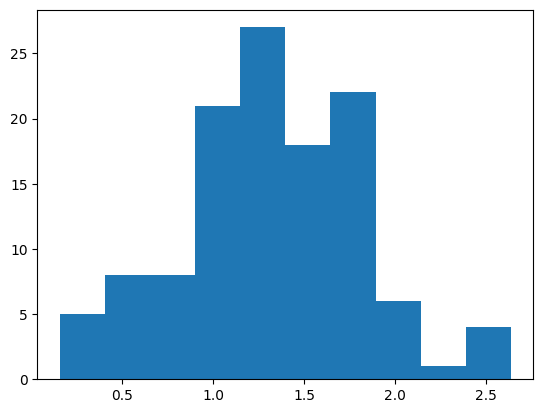

In [82]:
plt.hist(Y_1)
plt.show()

El beneficio promedio estimado con un pedido de 50 periodicos es

In [83]:
y_m = np.mean(Y_1)
print(y_m)

1.3214819731548597


con una desviacion estandar

In [84]:
s_m = np.std(Y_1)
print(s_m)

0.49256877274116284


con este modelo, podemos estimar el numero de veces qque se debe repetir dicho modelo con la ecuacion 

\begin{equation*}
  N = \left( \frac{2 \sigma z_{\frac{\alpha}{2} }}{\epsilon} \right)^2
\end{equation*}

In [85]:
N_1 = round(mt.pow((2*s_m*1.96)/(0.01),2))
print(N_1)

37283


debido al excesivo numero, se calcula de nuevo, pero con otro $\epsilon$

In [86]:
N_2 = round(mt.pow((2*s_m*1.96)/(0.1),2))
print(N_2)

373


Entonces, con 424 iteraciones, obtenemos

In [87]:
Y_2 = modelo (N_2,50)
y2_m = np.mean(Y_2)
s_y2 = np.std(Y_2)
print('y_m2 =',y2_m)
print('s_y2 =',s_y2)

y_m2 = 1.4440439843565467
s_y2 = 0.6193681875076422


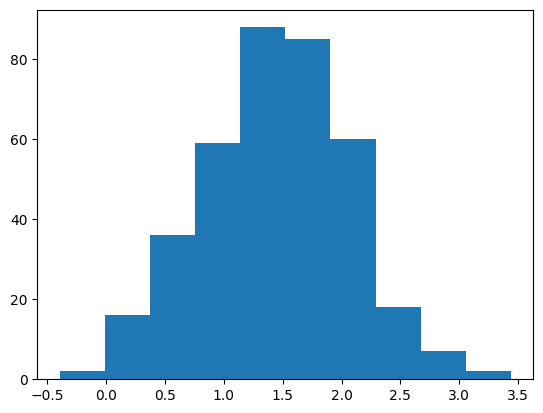

In [88]:
plt.hist(Y_2)
plt.show()

**Paso 7**. Hallar el intervalo de confianza para la media 
\begin{equation*}
  \bar{x} - Z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}} 
\end{equation*}

Intervalo de confianza para el beneficio promedio teniendo un pedido de 50 peridocos

In [89]:
print(y2_m - 1.96*(s_y2/np.sqrt(N_2)), y2_m + 1.96*s_y2/np.sqrt(N_2))

1.3811874328812173 1.506900535831876


entonces, el beneficio promedio estimado esta dentro del intervalo con una confiabilidad del 95\%

Por tanto, el beneficio promedio para un pedido de 50 periodicos es 

In [90]:
print('p =',y2_m)

p = 1.4440439843565467


### Inciso C

(c) Determine, por simulacion, el pedido de periodicos que optimiza el beneficio

Suponiendo que se comprar solo las posibles ventas de periodicos, tendriamos los posibles pedidos de 

[30,40,50,60,70]

In [91]:
pedidos = [30,40,50,60,70]

Si realizamos la simulacion para cada pedido, podriamos determinar cual pedido nos da el mejor beneficio

In [92]:
# mejor_pedido: Funcion que devuleve una lista con el beneficio promedio de 
# cada pedido

def mejor_pedido(p):
  L = []
  n= len(p)
  for x in range(n):

    L1 = modelo(400,p[x])
    L.append(np.mean(L1))
  return(L)


In [94]:
E = mejor_pedido(pedidos)

print(E)

[2.493901949621245, 3.7057713597911026, 1.3854350244513336, -4.450363340170526, -13.066188360368496]


Entonces, el pedido qque maximiza el beneficio es

In [95]:
print('El pedido con',pedidos[E.index(max(E))],'periodicos')
print('con un beneficion promedio de ',max(E),'euros')

El pedido con 40 periodicos
con un beneficion promedio de  3.7057713597911026 euros
